In [1]:
import xgboost
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import random

In [2]:
def getInputOutputFolder(fileFlag=None):
    f  = open("data_file.txt", "r")
    i  = 0
    for l in f.readlines():
        if fileFlag<32:
            if i==fileFlag:
                foldName = l[:-1]
        if fileFlag==32:
            if i==fileFlag:
                foldName = l
        
        i = i+1
    f.close()
    dataNameSplit = foldName.split("/")
    inputFileName  = '../../data/'+ dataNameSplit[1]+'/inputs.csv'
    outputFileName = '../../data/'+ dataNameSplit[1]+'/outputs.csv'
    foldName       = '../../'+foldName
    return inputFileName,outputFileName,foldName,dataNameSplit[1]

In [3]:
# Input the File Number
# Not Working - 17,18,19,20,21,22,23,24,25
fileFlag = 0
inputFileName,outputFileName,foldName,dataName = getInputOutputFolder(fileFlag)
print(inputFileName)
print(outputFileName)
print(foldName)
print(dataName)

../../data/ATAC_JV_adipose/inputs.csv
../../data/ATAC_JV_adipose/outputs.csv
../../data/ATAC_JV_adipose/cv/equal_labels/folds.csv
ATAC_JV_adipose


In [4]:
input      = pd.read_csv(inputFileName)
label      = pd.read_csv(outputFileName)
folds      = pd.read_csv(foldName)
folds_iter = folds['fold'].unique()
print(folds_iter)
input.replace([np.inf, -np.inf], np.nan,inplace=True)

[2 4 1 3]


In [5]:
colnames       = input.columns.values
colnamesSeries = input.isna().sum()
nullColnames   = list(colnamesSeries.index[colnamesSeries>0].values)
nullColnames.append('sequenceID')
colnames       = [x for x in colnames if x not in nullColnames]

In [6]:
def chart_creation_xgboost(res,chart_title,chart_name,distribution,parameter):
    
    distributionCol = distribution + ","+str(parameter)
    min_valid = round(np.min(res['test'][distributionCol]),4)
    min_train = round(np.min(res['train'][distributionCol]),4)
    min_iter  = round(np.nanargmin(res['test'][distributionCol]),0)

    textstr = '\n'.join((
                    'Min Train = %.2f' % (min_train, ),
                    'Min Valid = %.2f' % (min_valid, ),
                    'Min Iter  = %.2f' % (min_iter, )))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor="black")
    
    fig,ax1       = plt.subplots()
    ax2           = ax1.twinx()

    ln1 = ax1.plot(res['train'][distributionCol],color='blue',label='Training')
    ln2 = ax2.plot(res['test'][distributionCol],color='orange',label='Validation')
    
    lns = ln1 + ln2
    
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='lower left',fancybox='round', facecolor='wheat',fontsize=8)
    
    ax1.set_xlabel("Number of Iterations(Trees)")
    ax1.set_ylabel("Training Negative Likelihood(Loss)")
    ax2.set_ylabel("Validation Negative Likelihood(Loss)")
    ax2.text(0.7, 0.90, textstr, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
    plt.title(chart_title)
    plt.show()
    fig.savefig(chart_name)
    
def generate_result(X,y_lower,y_higher,params,X_val=None,y_lower_val=None,y_higher_val=None):
    
    res    = {}
    dtrain = xgboost.DMatrix(X)
    dtrain.set_float_info("label_lower_bound",y_lower)
    dtrain.set_float_info("label_upper_bound",y_higher)
    
    dtest  = xgboost.DMatrix(X_val)
    dtest.set_float_info("label_lower_bound",y_lower_val)
    dtest.set_float_info("label_upper_bound",y_higher_val)
    
    bst    = xgboost.train(params,dtrain,num_boost_round=100,evals=[(dtrain,"train"),(dtest,"test")],evals_result=res)
    return res

In [7]:
def calculateSummaryStats(data):
    data     = list(filter(lambda x : x not in [float('inf'),-float('inf')],data))
    std      = np.std(data)
    avg      = np.mean(data)
    return std,avg

[0]	train-normal,1.35:inf	test-normal,1.35:12.1846
[1]	train-normal,1.35:inf	test-normal,1.35:10.3103
[2]	train-normal,1.35:inf	test-normal,1.35:8.73163
[3]	train-normal,1.35:7.048	test-normal,1.35:7.43884
[4]	train-normal,1.35:6.05534	test-normal,1.35:6.3798
[5]	train-normal,1.35:5.23729	test-normal,1.35:5.55797
[6]	train-normal,1.35:4.56155	test-normal,1.35:4.82241
[7]	train-normal,1.35:4.0083	test-normal,1.35:4.36202
[8]	train-normal,1.35:3.55131	test-normal,1.35:3.93944
[9]	train-normal,1.35:3.16903	test-normal,1.35:3.49973
[10]	train-normal,1.35:2.8543	test-normal,1.35:3.23143
[11]	train-normal,1.35:2.59025	test-normal,1.35:2.93655
[12]	train-normal,1.35:2.37195	test-normal,1.35:2.74744
[13]	train-normal,1.35:2.19383	test-normal,1.35:2.56943
[14]	train-normal,1.35:2.04326	test-normal,1.35:2.40762
[15]	train-normal,1.35:1.92072	test-normal,1.35:2.30739
[16]	train-normal,1.35:1.81636	test-normal,1.35:2.18593
[17]	train-normal,1.35:1.7259	test-normal,1.35:2.11621
[18]	train-normal,1.

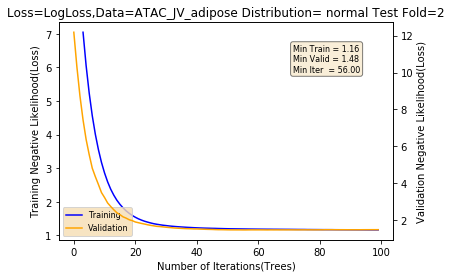

[0]	train-normal,1.27:inf	test-normal,1.27:inf
[1]	train-normal,1.27:inf	test-normal,1.27:12.7229
[2]	train-normal,1.27:inf	test-normal,1.27:10.9279
[3]	train-normal,1.27:inf	test-normal,1.27:9.54985
[4]	train-normal,1.27:6.27314	test-normal,1.27:8.30903
[5]	train-normal,1.27:5.37795	test-normal,1.27:7.39714
[6]	train-normal,1.27:4.6421	test-normal,1.27:6.56606
[7]	train-normal,1.27:4.03764	test-normal,1.27:5.98041
[8]	train-normal,1.27:3.5374	test-normal,1.27:5.37969
[9]	train-normal,1.27:3.13078	test-normal,1.27:4.9368
[10]	train-normal,1.27:2.79359	test-normal,1.27:4.50174
[11]	train-normal,1.27:2.51239	test-normal,1.27:4.16348
[12]	train-normal,1.27:2.28227	test-normal,1.27:3.89983
[13]	train-normal,1.27:2.09371	test-normal,1.27:3.69558
[14]	train-normal,1.27:1.9363	test-normal,1.27:3.51959
[15]	train-normal,1.27:1.80231	test-normal,1.27:3.32068
[16]	train-normal,1.27:1.68892	test-normal,1.27:3.20166
[17]	train-normal,1.27:1.59324	test-normal,1.27:3.06293
[18]	train-normal,1.27:1.5

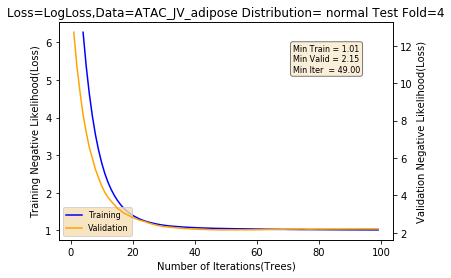

[0]	train-normal,1.27:inf	test-normal,1.27:inf
[1]	train-normal,1.27:11.1004	test-normal,1.27:inf
[2]	train-normal,1.27:9.35054	test-normal,1.27:inf
[3]	train-normal,1.27:7.92834	test-normal,1.27:inf
[4]	train-normal,1.27:6.75562	test-normal,1.27:5.97316
[5]	train-normal,1.27:5.79629	test-normal,1.27:5.14238
[6]	train-normal,1.27:5.00245	test-normal,1.27:4.45621
[7]	train-normal,1.27:4.34451	test-normal,1.27:3.90365
[8]	train-normal,1.27:3.79782	test-normal,1.27:3.44619
[9]	train-normal,1.27:3.34524	test-normal,1.27:3.06712
[10]	train-normal,1.27:2.9724	test-normal,1.27:2.71111
[11]	train-normal,1.27:2.66201	test-normal,1.27:2.44545
[12]	train-normal,1.27:2.40468	test-normal,1.27:2.24596
[13]	train-normal,1.27:2.19059	test-normal,1.27:2.05972
[14]	train-normal,1.27:2.01408	test-normal,1.27:1.91681
[15]	train-normal,1.27:1.86478	test-normal,1.27:1.79965
[16]	train-normal,1.27:1.7421	test-normal,1.27:1.70277
[17]	train-normal,1.27:1.63941	test-normal,1.27:1.62084
[18]	train-normal,1.27:1

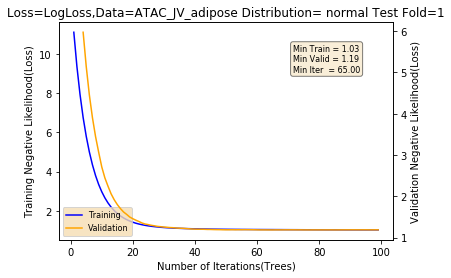

[0]	train-normal,1.26:inf	test-normal,1.26:inf
[1]	train-normal,1.26:inf	test-normal,1.26:8.8525
[2]	train-normal,1.26:inf	test-normal,1.26:7.31612
[3]	train-normal,1.26:inf	test-normal,1.26:6.08227
[4]	train-normal,1.26:6.8373	test-normal,1.26:5.0916
[5]	train-normal,1.26:5.85161	test-normal,1.26:4.36426
[6]	train-normal,1.26:5.03583	test-normal,1.26:3.77155
[7]	train-normal,1.26:4.35807	test-normal,1.26:3.28442
[8]	train-normal,1.26:3.79837	test-normal,1.26:2.89067
[9]	train-normal,1.26:3.34099	test-normal,1.26:2.57112
[10]	train-normal,1.26:2.95812	test-normal,1.26:2.33183
[11]	train-normal,1.26:2.64045	test-normal,1.26:2.12845
[12]	train-normal,1.26:2.37407	test-normal,1.26:1.96175
[13]	train-normal,1.26:2.15512	test-normal,1.26:1.8293
[14]	train-normal,1.26:1.97027	test-normal,1.26:1.73398
[15]	train-normal,1.26:1.81935	test-normal,1.26:1.65309
[16]	train-normal,1.26:1.69043	test-normal,1.26:1.60772
[17]	train-normal,1.26:1.58435	test-normal,1.26:1.56221
[18]	train-normal,1.26:1.4

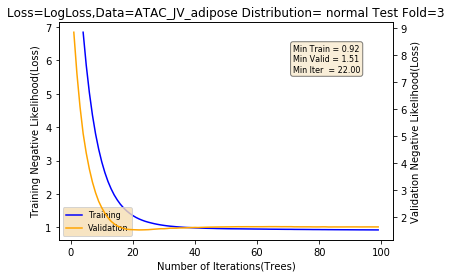

In [8]:
for i in folds_iter:
    
    distribution = 'normal'
    test_fold    = i
    test_id      = folds[folds["fold"]==i]['sequenceID']
    train_id     = folds[folds["fold"]!=i]['sequenceID']
    
    nullId       = label[(label['min.log.lambda']==-float('inf'))&(label['max.log.lambda']==float('inf'))]['sequenceID']
    X            = input[input['sequenceID'].isin(train_id)&(~input['sequenceID'].isin(nullId))]
    X_val        = input[input['sequenceID'].isin(test_id)&(~input['sequenceID'].isin(nullId))]
    X            = X[colnames]
    X_val        = X_val[colnames]
    y_label      = label[label['sequenceID'].isin(train_id)&(~label['sequenceID'].isin(nullId))]
    y_label_test = label[label['sequenceID'].isin(test_id)&(~label['sequenceID'].isin(nullId))]
    
    std_higher,avg_higher = calculateSummaryStats(y_label['max.log.lambda'].copy())
    std_lower,avg_lower   = calculateSummaryStats(y_label['min.log.lambda'].copy())
    
    std_cal        = round((std_higher+std_lower)/2,2)
    sigma          = std_cal
    base_score_cal = (avg_higher+avg_lower)/2
    base_score     = base_score_cal
    
    distributionCol = 'normal,' + str(sigma)
    y_lower      = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label['min.log.lambda'])))
    y_higher     = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label['max.log.lambda'])))
    y_lower_val  = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label_test['min.log.lambda'])))
    y_higher_val = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label_test['max.log.lambda'])))
    
    data_name    = dataName
    title        = 'Loss=LogLoss,Data='+data_name+' Distribution= '+distribution+' Test Fold='+str(test_fold)
    file_name    = title+'.png'
    
    eval_metric  = 'aft-nloglik@'+distributionCol
    
    params = {'learning_rate':0.1, 'aft_noise_distribution' : distribution, 'aft_sigma': sigma,'eval_metric':eval_metric,'base_score':base_score,'objective':"aft:survival"}
    bst    = generate_result(X,y_lower,y_higher,params,X_val,y_lower_val,y_higher_val)
    chart_creation_xgboost(bst,title,file_name,distribution,sigma)